# Lab 1 Pengolahan Citra Digita

Pada Lab ini, akan dipelajari tentang pengolahan citra pada domain spasial yang meliputi 2 jenis pemrosesan citra sederhana, yaitu **Point Processing** dan **Mask Processing**.

Point Processing terdiri dari:
- Citra Negative
- Log Processing
- Gamma Transformation
- Image Histogram
- Contrast Stretching
- Histogram Equalization
- Image Substraction

Mask Processing terdiri dari:
- Smoothing Filter (Linear dan Non-Linear)
- Sharpening Filter

Sebelum memulai proses pengolahan citra, maka harus melakukan `import` library yang akan digunakan.

## Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters, util, exposure

## Load Gambar

(-0.5, 799.5, 799.5, -0.5)

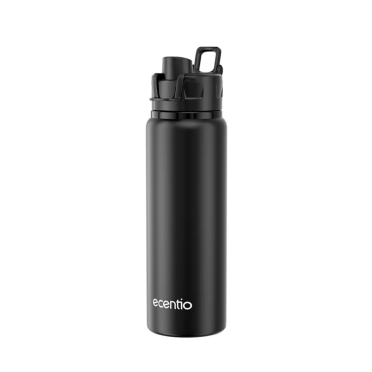

In [2]:
path_image = "C:/Users/Prastha/Downloads/tumbler.jpg"
og_image = io.imread(path_image)
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1); plt.imshow(og_image)
plt.axis("off")

## Point Processing

### Image Negatif (Invert)

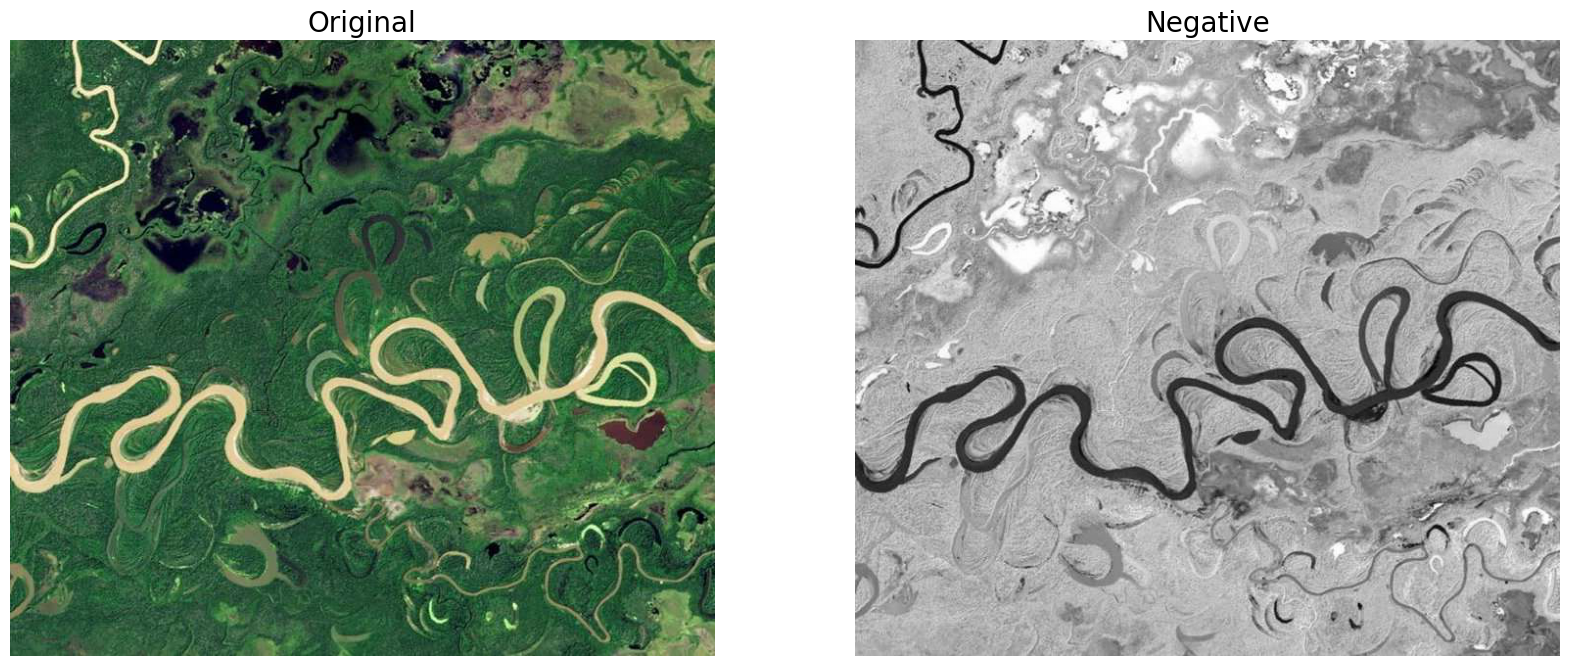

In [24]:
og_image = io.imread(path_image)
og_image_gray = color.rgb2gray(og_image)
og_image_inv = 255-og_image_gray

plt.figure(figsize=(20, 10))
plt.subplot(1,2,1); plt.imshow(og_image)
plt.title('Original', fontsize=20); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(og_image_inv, cmap='gray')
plt.title('Negative', fontsize=20); plt.axis("off")
plt.show()

### Log Processing

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.3862943611198906].


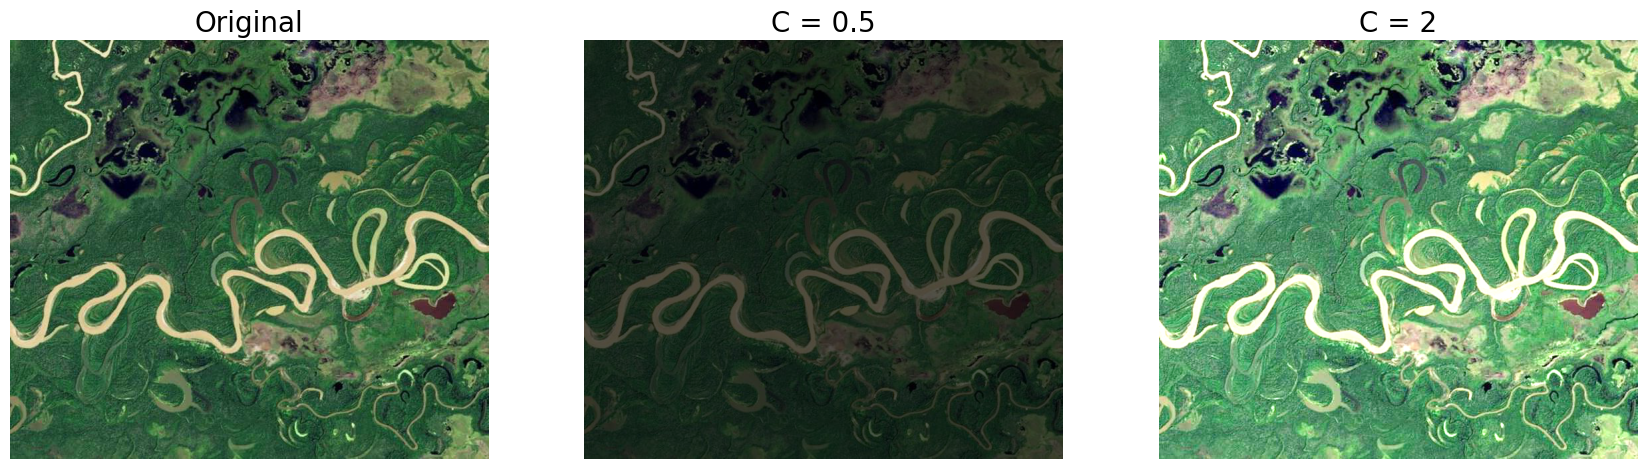

In [25]:
a = og_image/255
c1 = 0.5
c2 = 2
l1 = c1*np.log(1 + (a))
l2 = c2*np.log(1 + (a))

plt.figure(figsize=(21, 14))

plt.subplot(1,3,1); plt.imshow(og_image)
plt.title('Original', fontsize=20); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(l1)
plt.title('C = 0.5', fontsize=20); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(l2)
plt.title('C = 2', fontsize=20); plt.axis("off")
plt.show()


### Gamma Transformation

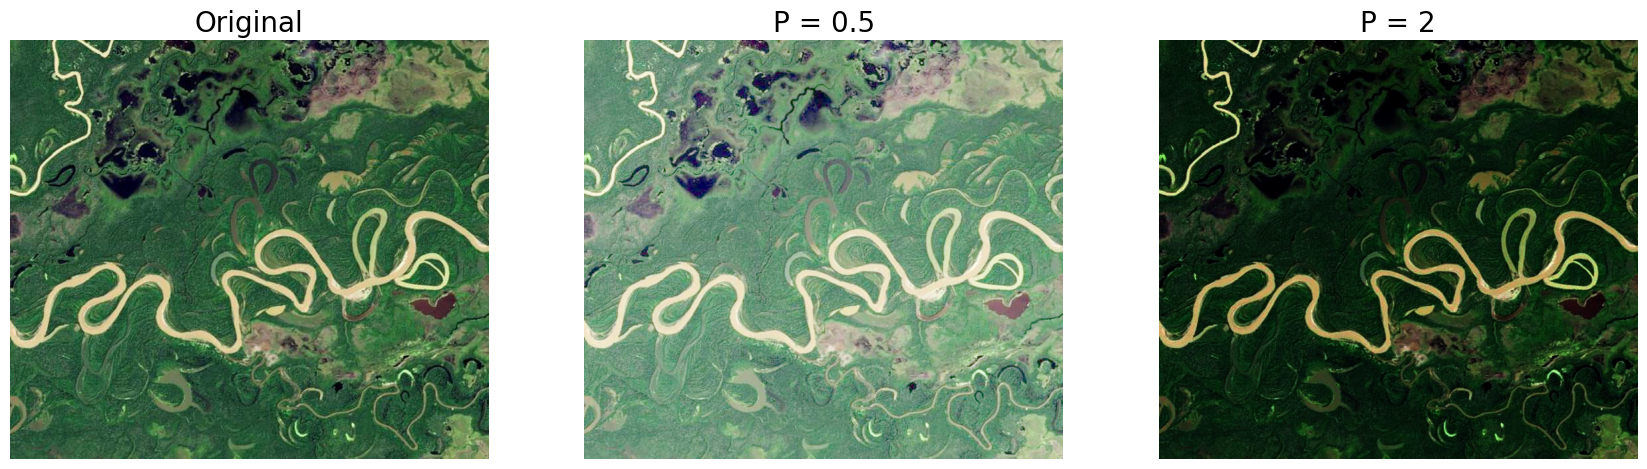

In [26]:
a = og_image/255
c = 1
p1 = 0.5
p2 = 2
g1 = c*(a**p1)
g2 = c*(a**p2)

plt.figure(figsize=(21, 14))

plt.subplot(1,3,1); plt.imshow(og_image)
plt.title('Original', fontsize=20); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(g1)
plt.title('P = 0.5', fontsize=20); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(g2)
plt.title('P = 2', fontsize=20); plt.axis("off")
plt.show()


### Image Histogram

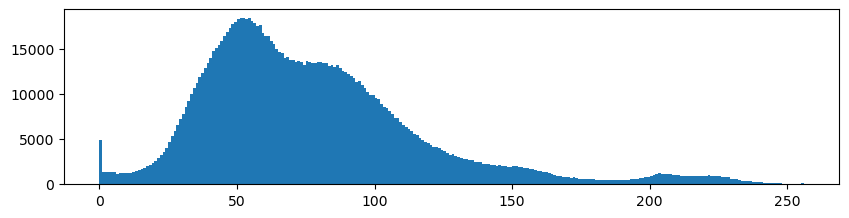

In [27]:
from skimage import util
plt.figure(figsize=(10, 5))

cat_flat = util.img_as_ubyte(og_image).flatten()
plt.subplot(2,1,1)
plt.hist(cat_flat, 256, range=(0,256))

plt.show()


### Contrast Stretching

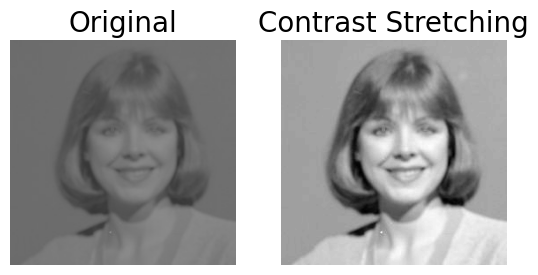

In [9]:
face = io.imread("C:/Users/User/Downloads/face_grayscale.jpg")
mn = min(face.flatten())
mx = max(face.flatten())
b = int(np.floor(255 / (mx - mn)))
face_cs = (face - mn) * b
plt.subplot(1,2,1); plt.imshow(face)
plt.title('Original', fontsize=20); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(face_cs)
plt.title('Contrast Stretching', fontsize=20); plt.axis("off")
plt.show()


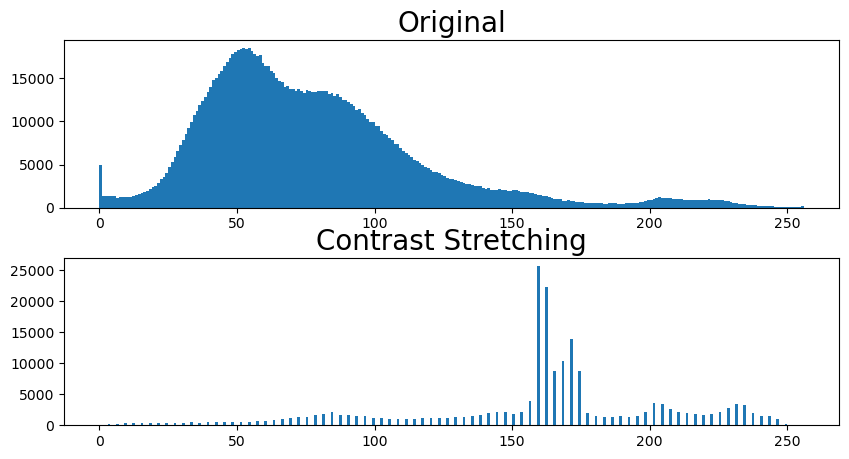

In [10]:
from skimage import util
plt.figure(figsize=(10, 5))

bug_flat = util.img_as_ubyte(face).flatten()
plt.subplot(2,1,1)
plt.hist(cat_flat, 256, range=(0,256))
plt.title('Original', fontsize=20)

cat_cs_flat = util.img_as_ubyte(face_cs).flatten()
plt.subplot(2,1,2)
plt.hist(cat_cs_flat, 256, range=(0,256))
plt.title('Contrast Stretching', fontsize=20)

plt.subplots_adjust(hspace=0.3)
plt.show()


### Histogram Equalization

c:\Users\User\anaconda3\envs\pengcit\lib\site-packages\skimage\_shared\utils.py:438: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


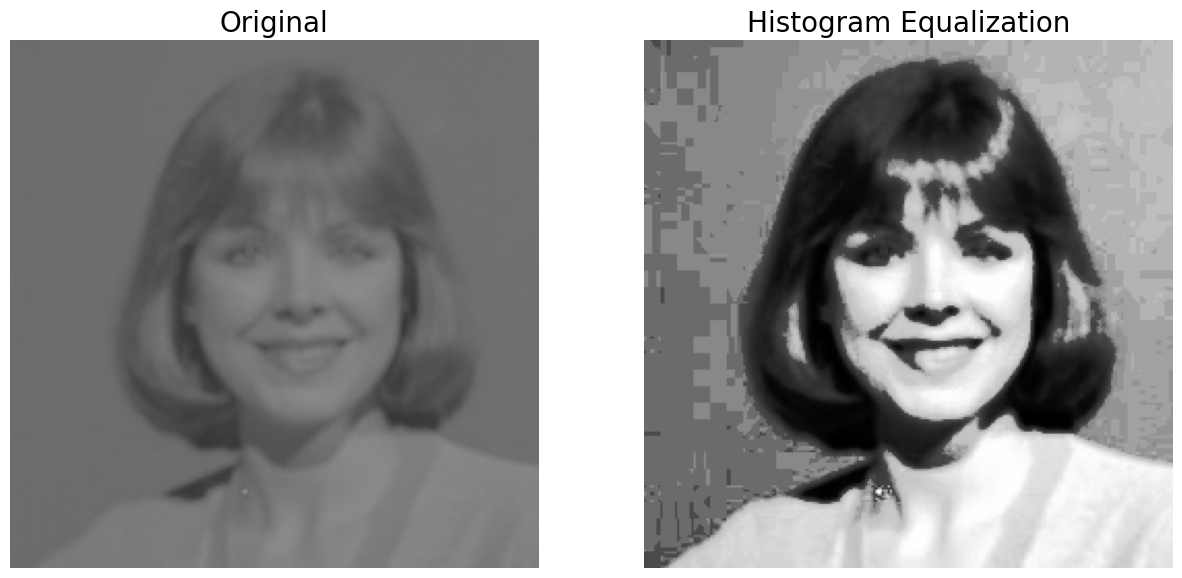

In [11]:
from skimage import exposure 
face_eq = exposure.equalize_hist(face)

plt.figure(figsize=(15, 10))

plt.subplot(1,2,1); plt.imshow(face)
plt.title('Original', fontsize=20); plt.axis("off")

plt.subplot(1,2,2); plt.imshow(face_eq)
plt.title('Histogram Equalization', fontsize=20);
plt.axis("off")

plt.show()

### Image Substraction

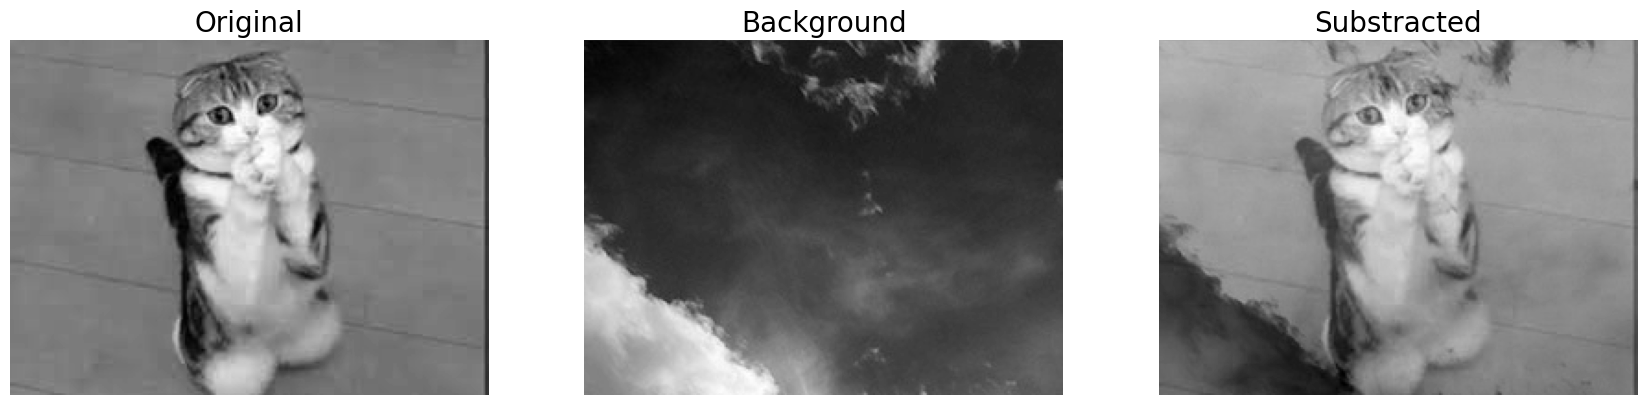

In [12]:
i_mix = io.imread('C:/Users/User/Downloads/images.jpg')
i_back = io.imread('C:/Users/User/Downloads/awan.jpg') 

# Konversi agar citra bisa diolah
i_mix = util.img_as_ubyte(color.rgb2gray(i_mix))
i_back = util.img_as_ubyte(color.rgb2gray(i_back))

i_subs = np.subtract(i_mix, i_back, dtype='int16')

plt.figure(figsize=(21, 14))
plt.subplot(1,3,1); plt.imshow(i_mix, cmap='gray')
plt.title('Original', fontsize=20); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(i_back, cmap='gray')
plt.title('Background', fontsize=20); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(i_subs, cmap='gray')
plt.title('Substracted', fontsize=20); plt.axis("off")
plt.show()


## Mask Processing

### Smoothing Filter

#### Linear Filter

##### Average Filter

C:\Users\Prastha\AppData\Local\Temp\ipykernel_6332\1222560419.py:5: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  fi = filters.rank.mean(gray,footprint=morphology.square(4))
c:\Users\Prastha\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3577: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


(-0.5, 799.5, 799.5, -0.5)

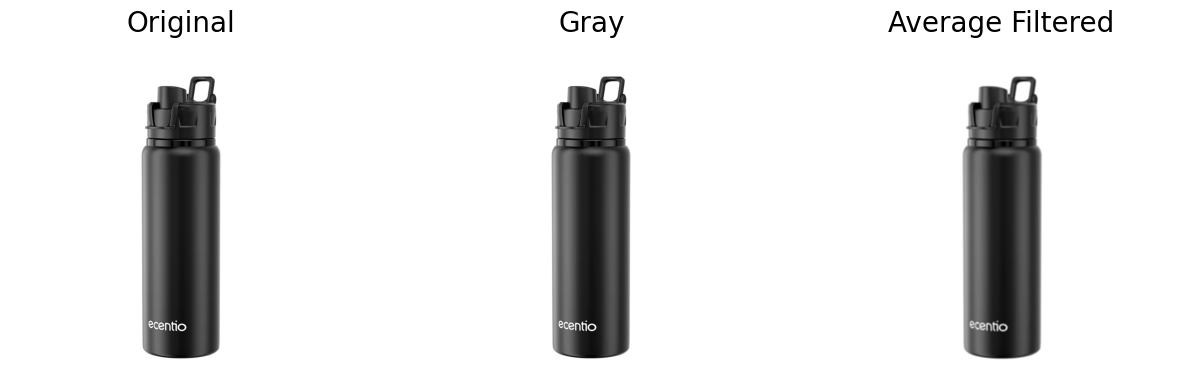

In [3]:
from skimage import filters, morphology
path_image = "C:/Users/Prastha/Downloads/tumbler.jpg"
i1 = io.imread(path_image) 
gray = color.rgb2gray(i1)
fi = filters.rank.mean(gray,footprint=morphology.square(4))

plt.figure(figsize=(15, 10))
plt.subplot(1,3,1)
plt.imshow(i1,cmap='gray')
plt.title('Original', fontsize=20); plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(gray, cmap='gray', )
plt.title('Gray',fontsize=20); plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(fi,cmap='gray',vmin=0,vmax=255)
plt.title('Average Filtered', fontsize=20); plt.axis("off")




#### Gaussian Filter

(-0.5, 259.5, 192.5, -0.5)

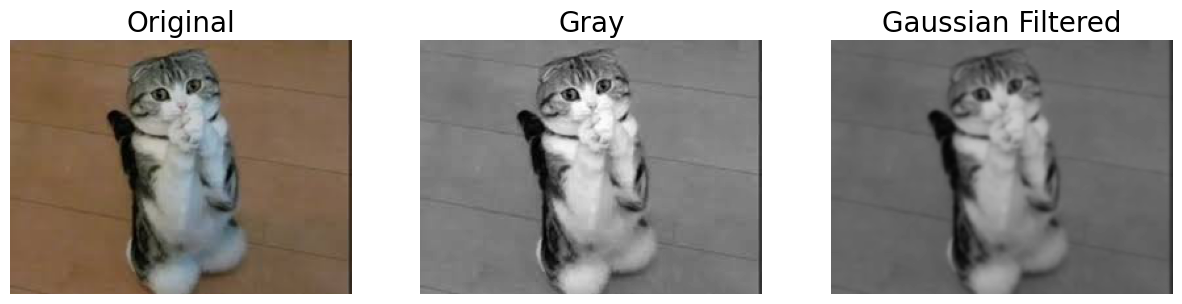

In [51]:
fi_gauss = util.img_as_ubyte(filters.gaussian(gray, sigma=1))

plt.figure(figsize=(15, 10))
plt.subplot(1,3,1)
plt.imshow(i1,cmap='gray')
plt.title('Original', fontsize=20); plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(gray, cmap='gray', )
plt.title('Gray',fontsize=20); plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(fi_gauss,cmap='gray',vmin=0,vmax=255)
plt.title('Gaussian Filtered', fontsize=20); plt.axis("off")


#### Non-Linear Filter

##### Median Filter

(-0.5, 259.5, 192.5, -0.5)

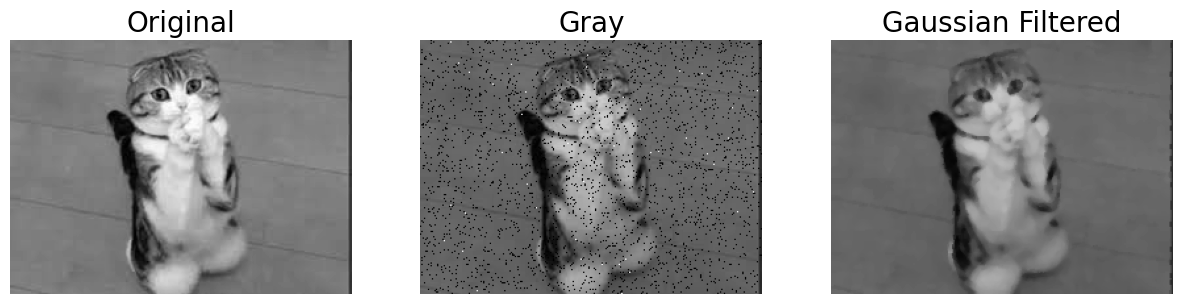

In [53]:
noise = util.img_as_ubyte(util.random_noise(gray, mode='s&p', salt_vs_pepper=0.02))
fi_median = filters.rank.median(noise, footprint= morphology.square(4))

plt.figure(figsize=(15, 10))
plt.subplot(1,3,1)
plt.imshow(gray,cmap='gray')
plt.title('Original', fontsize=20); plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(noise, cmap='gray', )
plt.title('Gray',fontsize=20); plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(fi_median,cmap='gray',vmin=0,vmax=255)
plt.title('Gaussian Filtered', fontsize=20); plt.axis("off")

##### Minimum Filter

c:\Users\User\anaconda3\envs\pengcit\lib\site-packages\IPython\core\interactiveshell.py:3526: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


(-0.5, 259.5, 192.5, -0.5)

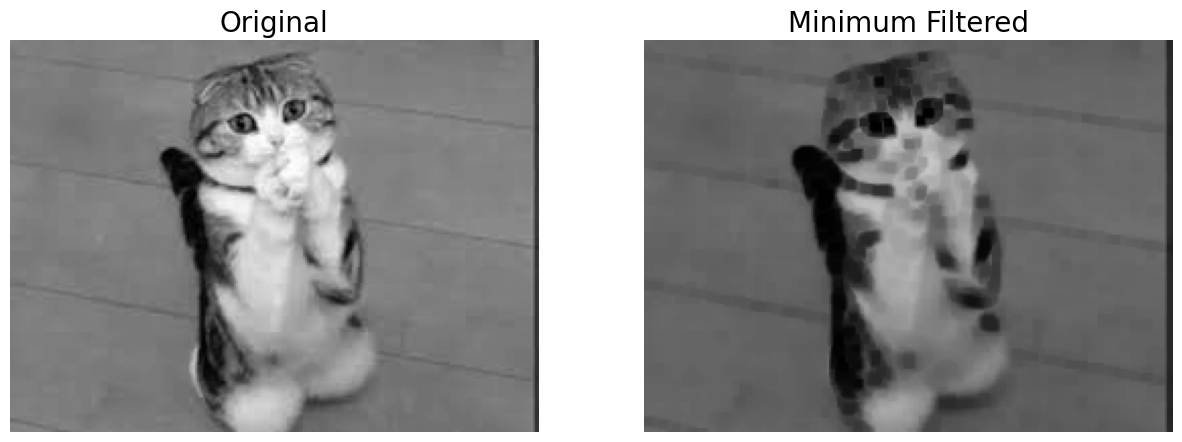

In [55]:
fi_mini = filters.rank.minimum(gray, footprint=morphology.square(4))
plt.figure(figsize=(15, 10))
plt.subplot(1,2,1)
plt.imshow(gray,cmap='gray')
plt.title('Original', fontsize=20); plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(fi_mini,cmap='gray',vmin=0,vmax=255)
plt.title('Minimum Filtered', fontsize=20); plt.axis("off")

##### Maximum Filter

c:\Users\User\anaconda3\envs\pengcit\lib\site-packages\IPython\core\interactiveshell.py:3526: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


(-0.5, 259.5, 192.5, -0.5)

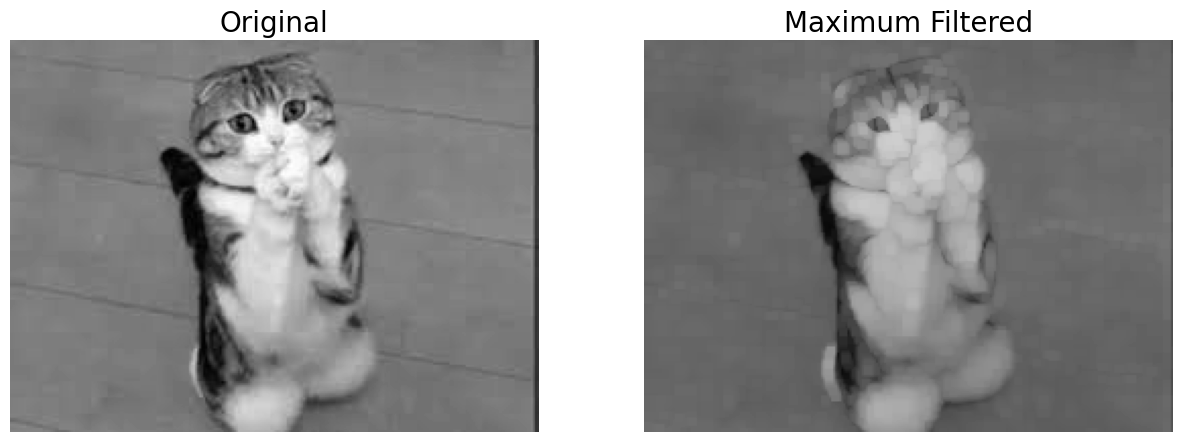

In [56]:
fi_maxi = filters.rank.maximum(gray, footprint=morphology.square(4))
plt.figure(figsize=(15, 10))
plt.subplot(1,2,1)
plt.imshow(gray,cmap='gray')
plt.title('Original', fontsize=20); plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(fi_maxi,cmap='gray',vmin=0,vmax=255)
plt.title('Maximum Filtered', fontsize=20); plt.axis("off")

### Sharpening Filter

(-0.5, 799.5, 799.5, -0.5)

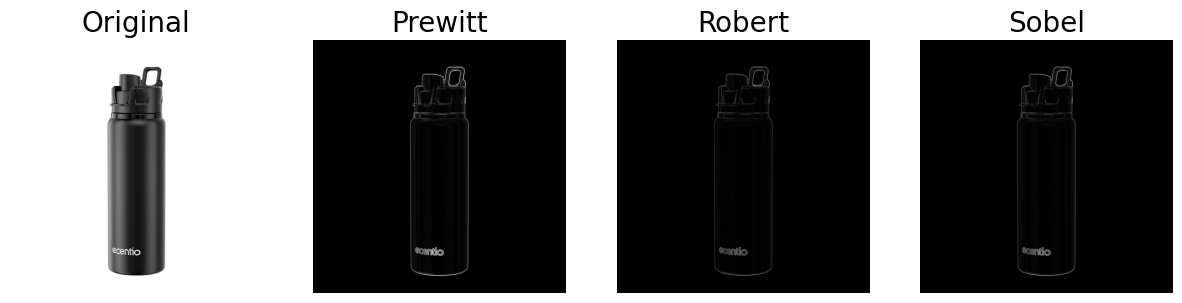

In [4]:
plant = color.rgb2gray(io.imread("C:/Users/Prastha/Downloads/tumbler.jpg"))
plant_prewitt = util.img_as_ubyte(filters.prewitt(plant))
plant_roberts = util.img_as_ubyte(filters.roberts(plant))
plant_sobel = util.img_as_ubyte(filters.sobel(plant))

plt.figure(figsize=(15, 10))
plt.subplot(1,4,1)
plt.imshow(plant,cmap='gray')
plt.title('Original', fontsize=20); plt.axis("off")

plt.subplot(1,4,2)
plt.imshow(plant_prewitt, cmap='gray', )
plt.title('Prewitt',fontsize=20); plt.axis("off")

plt.subplot(1,4,3)
plt.imshow(plant_roberts,cmap='gray',vmin=0,vmax=255)
plt.title('Robert', fontsize=20); plt.axis("off")

plt.subplot(1,4,4)
plt.imshow(plant_sobel,cmap='gray',vmin=0,vmax=255)
plt.title('Sobel', fontsize=20); plt.axis("off")

C:\Users\Prastha\AppData\Local\Temp\ipykernel_6332\3402518640.py:1: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  fi = filters.rank.mean(plant, footprint=morphology.square(3))
c:\Users\Prastha\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3577: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


(-0.5, 799.5, 799.5, -0.5)

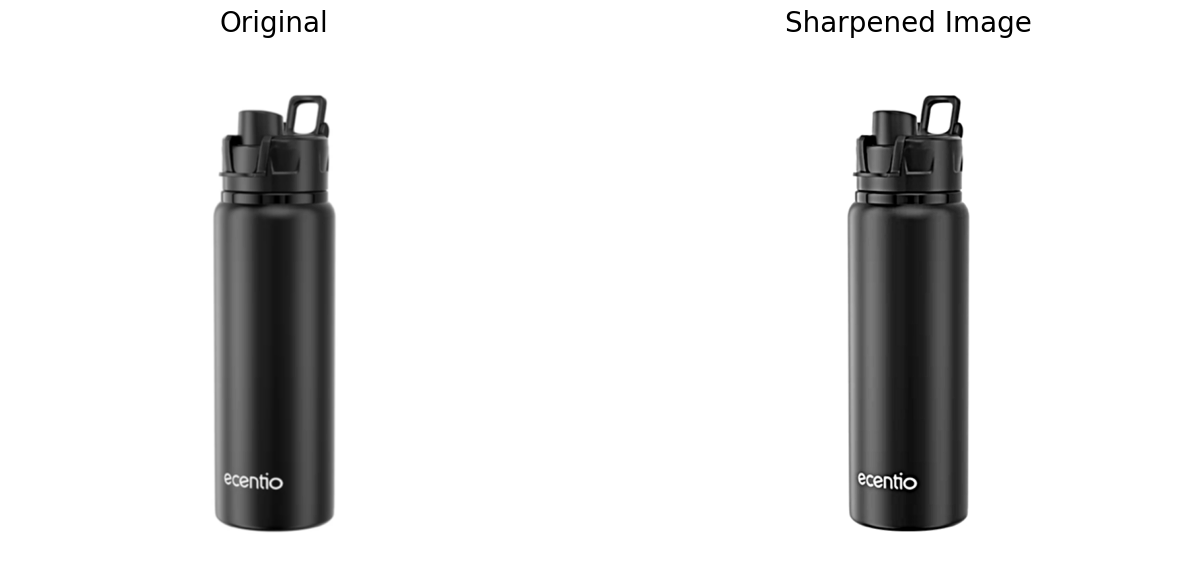

In [5]:
fi = filters.rank.mean(plant, footprint=morphology.square(3))
sh = filters.unsharp_mask(fi, radius=3)

plt.figure(figsize=(15, 10))
plt.subplot(1,2,1)
plt.imshow(fi,cmap='gray')
plt.title('Original', fontsize=20); plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(sh, cmap='gray', )
plt.title('Sharpened Image',fontsize=20); plt.axis("off")